In [9]:
import os
import sys

In [10]:
current_dir=os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,current_dir)

c:\Users\Yayerad\Desktop\AIM\Nova-Financial-Solutions\notebooks
c:\Users\Yayerad\Desktop\AIM\Nova-Financial-Solutions


In [2]:
# Import the functions
from scripts.data_loading import load_data 
from scripts.descriptive_stats import headline_length_stats, articles_per_publisher
from scripts.text_analysis import vader_sentiment_analysis
from scripts.time_series_analysis import publication_trends

In [4]:
# Load the data
df = load_data('../data/raw_analyst_ratings.csv')

Descriptive Statistics

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


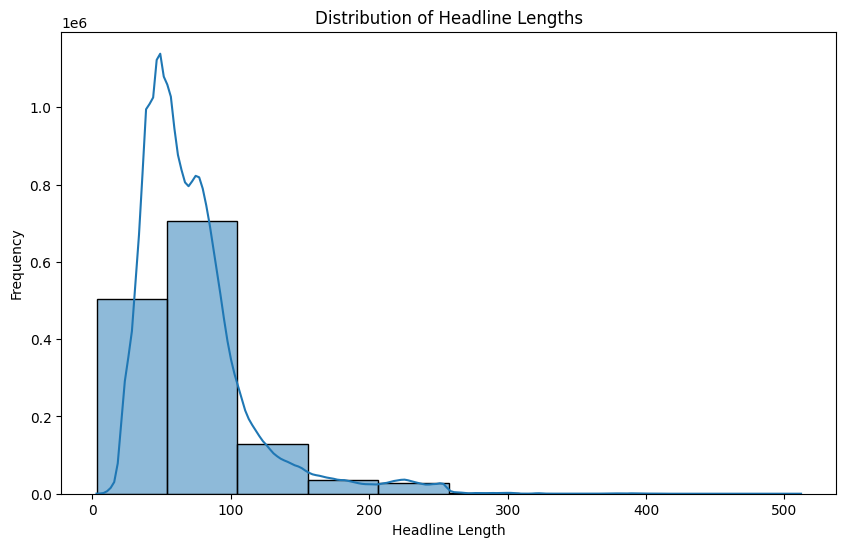

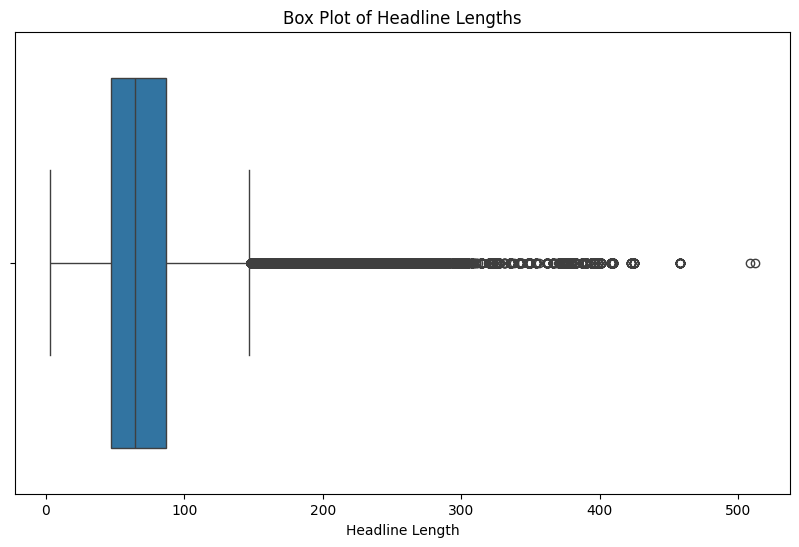

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate headline lengths
headline_stats = headline_length_stats(df)
print("Headline Length Statistics:\n", headline_stats)



# Plot histogram of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=10, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

# Box plot of headline lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['headline_length'])
plt.title('Box Plot of Headline Lengths')
plt.xlabel('Headline Length')
plt.show()

In [6]:
publisher_counts = articles_per_publisher(df)
print("\nArticles Per Publisher:\n", publisher_counts) 


Articles Per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64



Publication Trends:
 date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


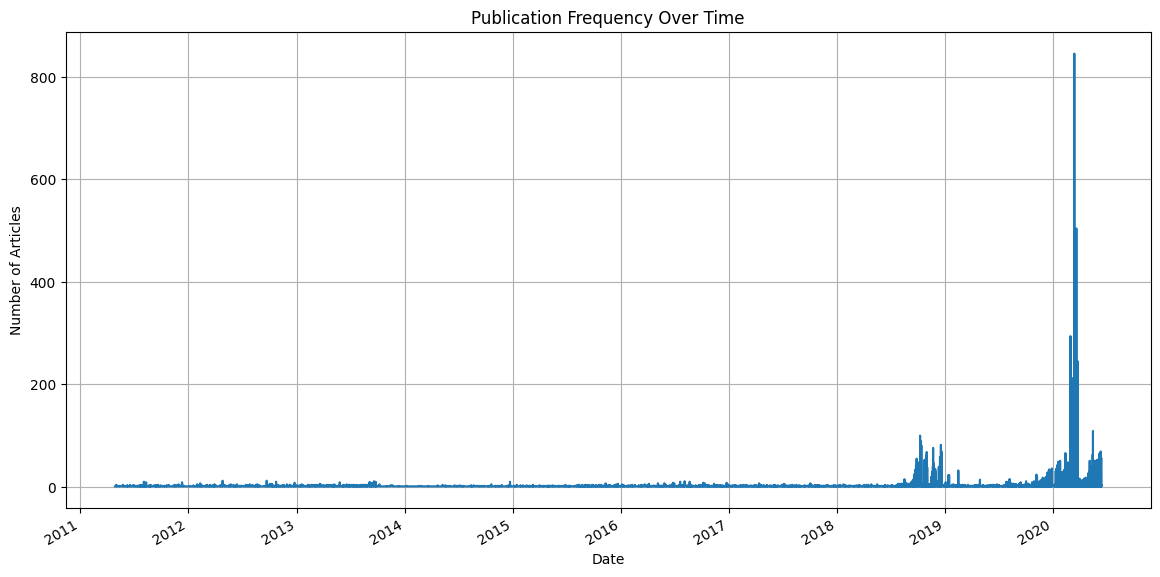

In [7]:
trends = publication_trends(df)
print("\nPublication Trends:\n", trends)

# Convert 'date' column to datetime format 
import pandas as pd
df['date'] = pd.to_datetime(df['date'])

# Plot publication trends over time
plt.figure(figsize=(14, 7))
df['date'].value_counts().sort_index().plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [8]:
df = vader_sentiment_analysis(df)

In [9]:
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  headline_length  sentiment  \
0 2020-06-05 10:30:54-04:00     A               39      0.000   
1 2020-06-

In [10]:
print("\nSentiment Category Summary:")
print(df['sentiment_category'].value_counts())


Sentiment Category Summary:
sentiment_category
neutral     739338
positive    442930
negative    225060
Name: count, dtype: int64


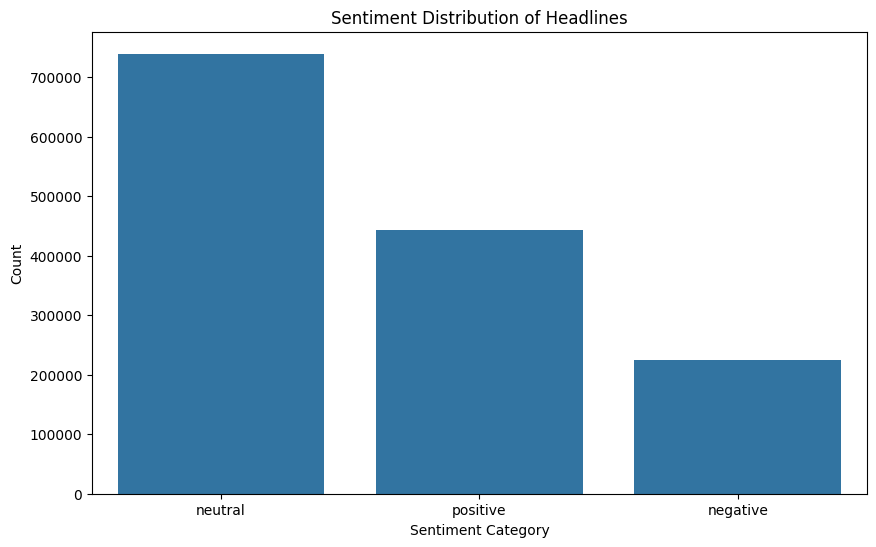

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()